In [23]:
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


In [17]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("pokemon_data.csv")


In [11]:

# One-hot encoding the types
df = pd.concat([df, pd.get_dummies(df[['type1', 'type2']].fillna('None'))], axis=1)
df_new = df.drop(['Unnamed: 0', 'pkdx_id', 'name', 'type1', 'type2'], axis=1)

In [12]:
df_new.head()

,hp,attack,defense,sp_attack,sp_defense,speed,total,type1_bug,type1_dark,type1_dragon,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,45,49,49,65,65,45,318,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,60,62,63,80,80,60,405,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,80,82,83,100,100,80,525,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,39,52,43,60,50,65,309,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,58,64,58,80,65,80,405,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_scaled)

# Plot the result


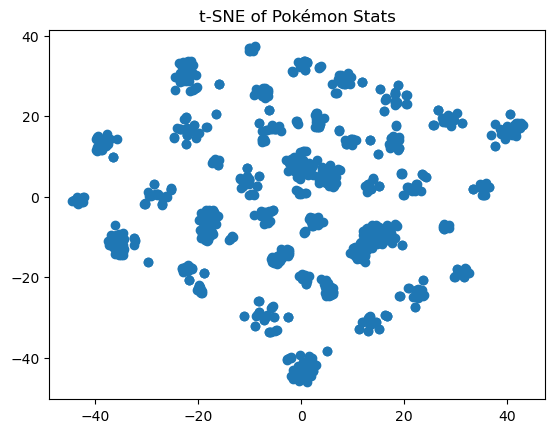

In [18]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE of Pokémon Stats')
plt.show()

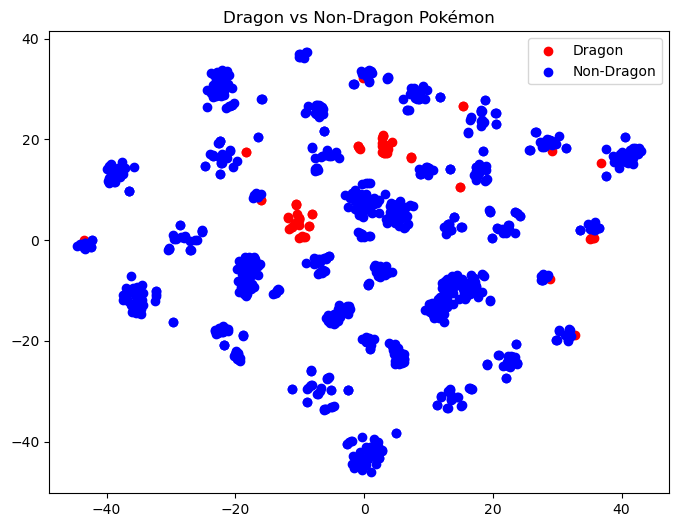

In [31]:
dragon_types = (df['type1'] == 'dragon') | (df['type2'] == 'dragon')

# Plot Dragon vs Non-Dragon
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[dragon_types, 0], tsne_result[dragon_types, 1], color='red', label='Dragon')
plt.scatter(tsne_result[~dragon_types, 0], tsne_result[~dragon_types, 1], color='blue', label='Non-Dragon')
plt.title('Dragon vs Non-Dragon Pokémon')
plt.legend()
plt.show()

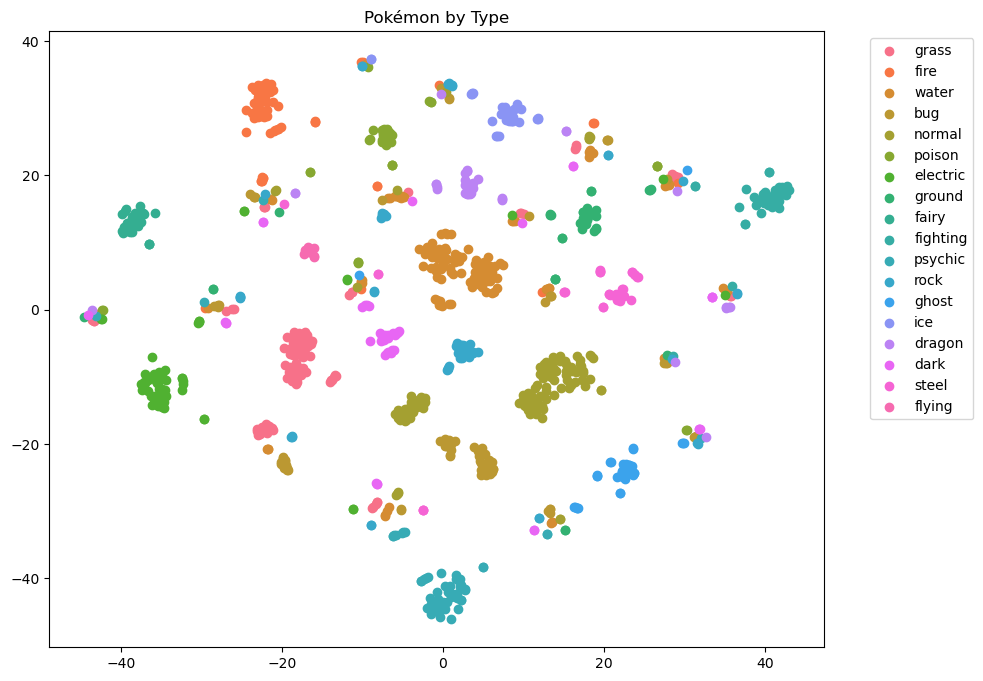

In [37]:
import seaborn as sns

# Combine Type1 and Type2 into a single 'Type' column
df['TypeCombo'] = df['type1']

# Get unique type combinations
unique_types = df['TypeCombo'].unique()

# Generate a color palette with seaborn
palette = sns.color_palette('husl', n_colors=len(unique_types))  # You can use any color palette you prefer

# Map each type combination to a color
type_to_color = {type_combo: palette[i] for i, type_combo in enumerate(unique_types)}

# Plot the t-SNE results with different colors for each type combination
plt.figure(figsize=(10, 8))
for type_combo in unique_types:
    idx = df['TypeCombo'] == type_combo
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], color=type_to_color[type_combo], label=type_combo)

plt.title('Pokémon by Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [24]:
bins = [0, 100, 200, 300, 400, 500, 600, np.inf]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600+']
df['StatRange'] = pd.cut(df['total'], bins=bins, labels=labels)

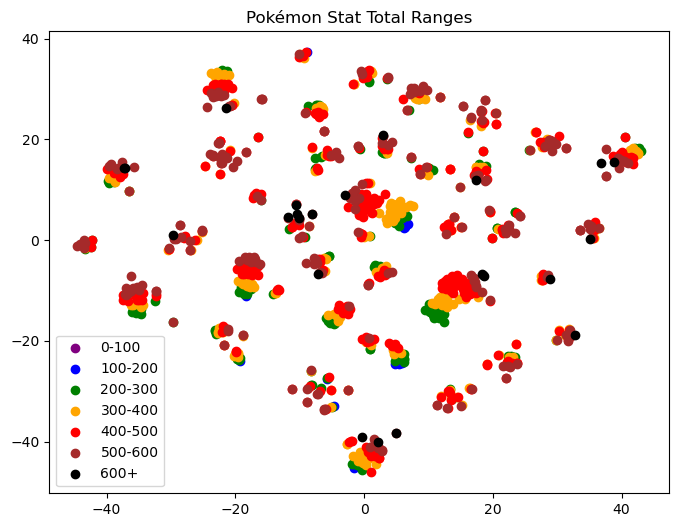

In [25]:
# Assign different colors for each range
colors = {'0-100': 'purple', '100-200': 'blue', '200-300': 'green', 
          '300-400': 'orange', '400-500': 'red', '500-600': 'brown', '600+': 'black'}

# Plot based on stat total ranges
plt.figure(figsize=(8, 6))
for stat_range in labels:
    idx = df['StatRange'] == stat_range
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], color=colors[stat_range], label=stat_range)

plt.title('Pokémon Stat Total Ranges')
plt.legend()
plt.show()

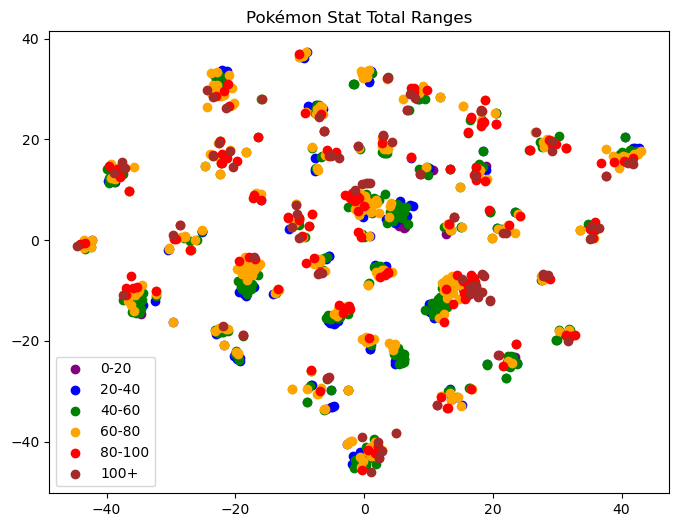

In [33]:
# Assign different colors for each range
bins = [0, 20, 40, 60, 80, 100, np.inf]
colors = {'0-20': 'purple', '20-40': 'blue', '40-60': 'green', 
          '60-80': 'orange', '80-100': 'red', '100+': 'brown'}
labels = list(colors.keys())
df['Range'] = pd.cut(df['hp'], bins=bins, labels=labels)
# Plot based on stat total ranges
plt.figure(figsize=(8, 6))
for stat_range in labels:
    idx = df['Range'] == stat_range
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], color=colors[stat_range], label=stat_range)

plt.title('Pokémon Stat Total Ranges')
plt.legend()
plt.show()